<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/trial_mol100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install kora -q
import kora.install.rdkit

In [26]:
from rdkit import Chem

In [27]:
!pip install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-g7iqzmq4
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-g7iqzmq4


In [28]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [29]:
import pandas as pd
df=pd.read_csv('/content/sample_data/mol100.csv')

target=df['Vina Score']
df2=df[['smiles']]
df2['mol'] = df2['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
from gensim.models import word2vec
from mol2vec import features
from mol2vec import helpers
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
df2['sentence'] = df2.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
model = word2vec.Word2Vec.load('/content/sample_data/model_300dim.pkl')
import numpy as np
df2['mol2vec'] = [DfVec(x) for x in sentences2vec(df2['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in df2['mol2vec']])
y = target.values
X.shape

(100, 100)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction,squared=False)
    r2_score_val = r2_score(y_test, prediction)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction[:300], "red", label="prediction", linewidth=1.0)
    plt.plot(y_test[:300], 'green', label="actual", linewidth=1.0)
    plt.legend()
    plt.ylabel('Vina_score')
    plt.title("MAE {}, MSE {}".format(round(mae, 4), round(mse, 4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('rMSE score:', round(mse,4))
    print('R2 score:', round(r2_score_val,4))

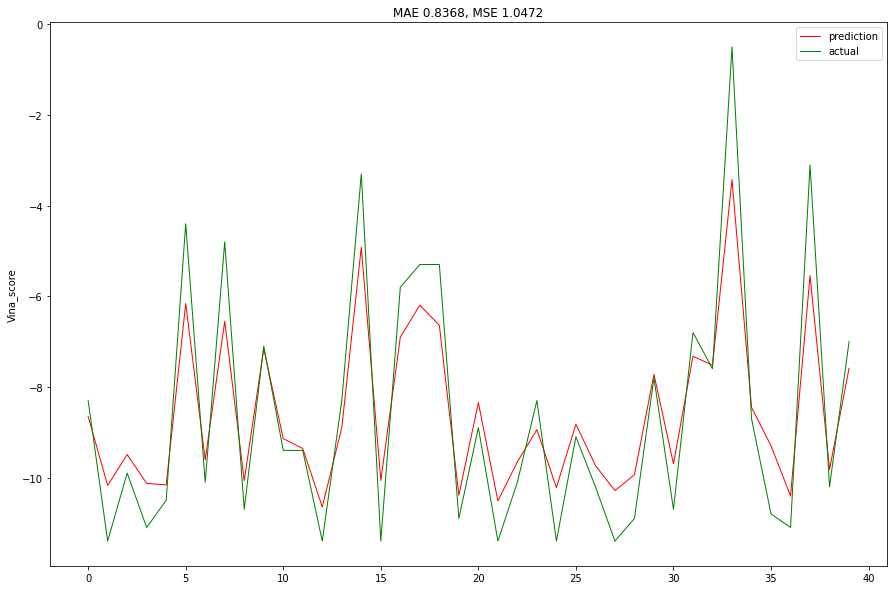

MAE score: 0.8368
rMSE score: 1.0472
R2 score: 0.8518


In [33]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.model_selection import train_test_split
 import matplotlib.pyplot as plt
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

regr = RandomForestRegressor(max_depth=7, random_state=1)
#cv = cross_validate(model, X, y, cv=5)
regr.fit(X, y)
evaluation(regr, X_test, y_test)

In [34]:
!git init

Reinitialized existing Git repository in /content/.git/
